In [1]:
import pandas as pd
import numpy as np
#For plotting
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score


In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("fulfilment_center_info.csv")
df3=pd.read_csv("meal_info.csv")

In [3]:
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


# Merging the lookups table to main data With primary key as meal_id and center_id respectively

In [6]:
res=pd.merge(df1,df3,on=['meal_id'])

In [7]:
res=pd.merge(res,df2,on=['center_id'])

In [8]:
res.sort_values('week',inplace=True)

In [9]:
res

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
284804,1409622,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0
285005,1203879,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0
285106,1235654,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0
43263,1393327,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,1184135,145,145,1778,160.05,160.08,1,0,378,Beverages,Italian,620,77,TYPE_A,3.9
350483,1007940,145,59,1445,727.53,726.53,0,1,40,Seafood,Continental,456,56,TYPE_A,4.2
262083,1154446,145,73,1770,440.38,442.38,0,0,55,Biryani,Indian,576,34,TYPE_A,4.0
448468,1450789,145,51,2304,484.03,485.03,0,0,80,Desert,Indian,638,56,TYPE_A,7.0


In [10]:
res.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [11]:
res.dtypes


id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [12]:
print('This dataset has ' + str(res.shape[0]) + ' rows, and ' + str(res.shape[1]) + ' columns')

This dataset has 456548 rows, and 15 columns


Numeric features description

In [13]:
res.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


Univariate Analysis

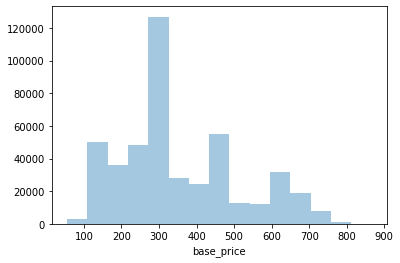

In [14]:
sns.distplot(res.base_price.dropna(), kde=False, bins = 15);

1.The plot looks like positive sekwed with mean of 354 rs

2.People tend to order item which has base price aroud 250-350 rs

checkout_price

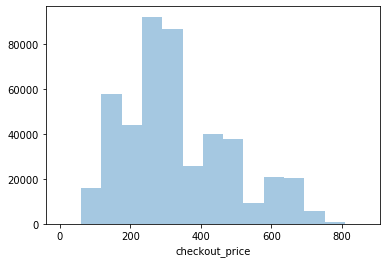

In [15]:
sns.distplot(res.checkout_price.dropna(), kde=False, bins = 15);

1. The graph is positive sekwed with mean of 332

2.Item with checkout price between 250-350 are ordered in high numbers .

# Here we can see that basic price and checkout price have a diffrence . Checkout price is relatively less in than base price

So we can make a feature which "Discount" which tells the discount offered on particular order

# Total amount of discount offered = (base price - checkout price)

In [16]:
res['discount'] = (res['base_price'] - res['checkout_price'])

In [17]:
res.discount.describe()

count    456548.000000
mean         21.917695
std          48.495857
min        -185.300000
25%          -1.000000
50%           1.000000
75%          16.520000
max         561.600000
Name: discount, dtype: float64

From Below code we can notice that discount is applied on more than half of orders

In [18]:
a=res.discount
flag=0
for i in a:
    if i>0:
        flag=flag+1
print(flag)

229687


In [19]:
len(res)

456548

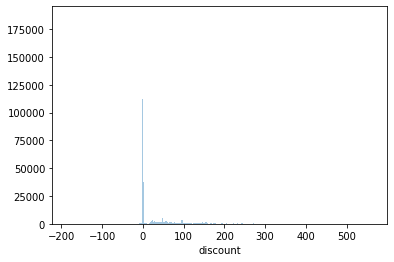

In [20]:
sns.distplot(res.discount.dropna(), kde=False, bins = 400);

It is highly posivtive sekwed

Making discount a "binary" column as this making it will give us the effect of discount on orders

In [21]:
res['discount_amt']=res['discount']
res.loc[res['discount'] <0, 'discount'] = 0
res.loc[res['discount'] > 0, 'discount'] = 1

In [22]:
res.discount.value_counts()

1.0    229687
0.0    226861
Name: discount, dtype: int64

In [23]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

Total 77 centers located 

In [24]:
res.center_id.nunique()

77

In [25]:
res.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

# Center Type

There are three type of center of type  A,B,C.


# Number of restaurant of each type

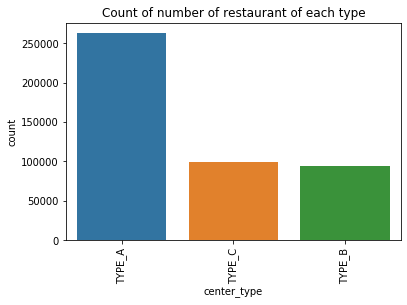

In [26]:
b = sns.countplot(data =res, x = 'center_type', order = res.center_type.value_counts().index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Count of number of restaurant of each type')
plt.show()

Type A restaurants are highest in number

# Operation area under each restraunt type

In [27]:
pivot = res.pivot_table(index=['center_type'], values=['op_area'], aggfunc='sum').reset_index()
pivot

,center_type,op_area
0,TYPE_A,1.082014e+06
1,TYPE_B,4.565292e+05
2,TYPE_C,3.258120e+05


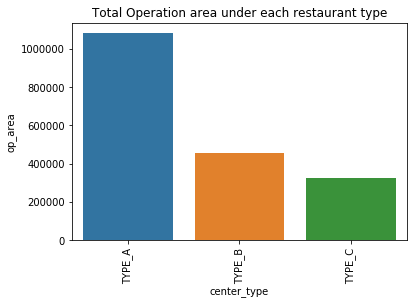

In [28]:
b = sns.barplot(data =pivot, x = 'center_type', y='op_area')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Total Operation area under each restaurant type')
plt.show()

In [29]:
res.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_amt
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1.0,15.46
284804,1409622,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0,1.0,2.00
285005,1203879,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,37.83
285106,1235654,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,37.83
43263,1393327,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6,0.0,0.00


Type A has highest operational area than B and than c

# Checking the most ordered category 

In [30]:
pivot = res.pivot_table(index=['category'], values=['num_orders'], aggfunc='sum').reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100

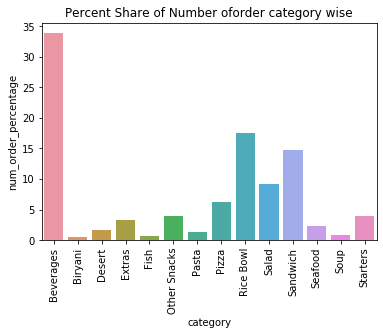

In [31]:
b = sns.barplot(data =pivot, x = 'category', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number oforder category wise')
plt.show()

Bevrages, RiceBowls, Sandwich, Salad hold a great share

#  Checking the most ordered CUISINE 

In [32]:
pivot = res.pivot_table(index=['cuisine'], values=['num_orders'], aggfunc='sum').reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100

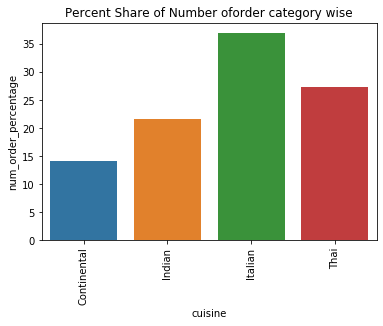

In [33]:
b = sns.barplot(data =pivot, x = 'cuisine', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number oforder category wise')
plt.show()

ITALIAN CUISINE ARE MOST ORDERED CUISINE

# Share of number of order region wise

In [34]:
pivot=pd.DataFrame(res.groupby('region_code').num_orders.sum()).reset_index()
pivot['num_order_percentage'] = pivot['num_orders']/pivot['num_orders'].sum()*100
pivot

,region_code,num_orders,num_order_percentage
0,23,1609906,1.346554
1,34,24051733,20.117296
2,35,691044,0.578001
3,56,60520191,50.620161
4,71,2103282,1.759222
5,77,20529653,17.171366
6,85,8685386,7.264611
7,93,1366290,1.142789


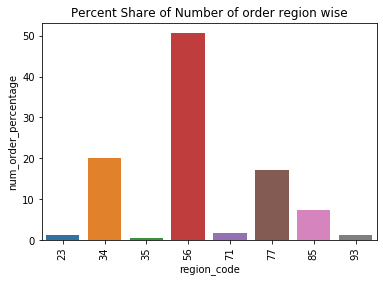

In [35]:
b = sns.barplot(data =pivot, x = 'region_code', y='num_order_percentage')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percent Share of Number of order region wise')
plt.show()

region with region code =56 have around 50% share in total orders

In [36]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

# Category most featured in homepage

In [37]:
pivot=pd.DataFrame(res.groupby('category').homepage_featured.sum()).reset_index()
pivot['homepage_featured_perc'] = pivot['homepage_featured']/pivot['homepage_featured'].sum()*100
pivot

,category,homepage_featured,homepage_featured_perc
0,Beverages,14573,29.230769
1,Biryani,60,0.120349
2,Desert,3367,6.753585
3,Extras,262,0.525524
4,Fish,408,0.818373
5,Other Snacks,4809,9.645973
6,Pasta,3805,7.632133
7,Pizza,7586,15.216127
8,Rice Bowl,2958,5.933206
9,Salad,1767,3.544278


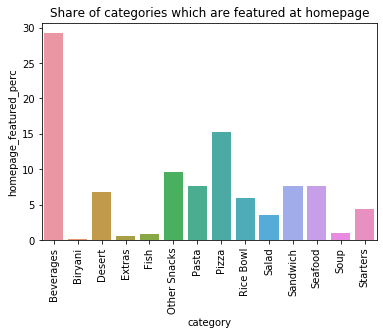

In [38]:
b = sns.barplot(data =pivot, x = 'category', y='homepage_featured_perc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Share of categories which are featured at homepage')
plt.show()

30% of times beverages featured on homepage|||
around 15% of times pizza is featured on homepage

# Category most promoted through email

In [39]:
pivot=pd.DataFrame(res.groupby('category').emailer_for_promotion.sum()).reset_index()
pivot['emailer_for_promotion_perc'] = pivot['emailer_for_promotion']/pivot['emailer_for_promotion'].sum()*100
pivot

,category,emailer_for_promotion,emailer_for_promotion_perc
0,Beverages,6596,17.802969
1,Biryani,0,0.000000
2,Desert,1804,4.869096
3,Extras,0,0.000000
4,Fish,141,0.380567
5,Other Snacks,653,1.762483
6,Pasta,2669,7.203779
7,Pizza,9382,25.322537
8,Rice Bowl,3086,8.329285
9,Salad,2084,5.624831


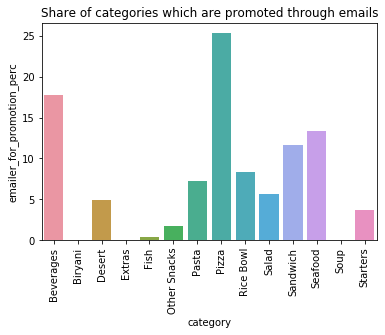

In [40]:
b = sns.barplot(data =pivot, x = 'category', y='emailer_for_promotion_perc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Share of categories which are promoted through emails')
plt.show()

Pizza is most promoted category for email promotion , around 25%  

# Percentage times categories are getting discounts

In [41]:
pivot=pd.DataFrame(res.groupby('category').discount.sum()).reset_index()
pivot['discount_percc'] = pivot['discount']/pivot['discount'].sum()*100
pivot

,category,discount,discount_percc
0,Beverages,63149.0,27.493502
1,Biryani,8818.0,3.839138
2,Desert,15155.0,6.598110
3,Extras,9413.0,4.098186
4,Fish,4145.0,1.804630
5,Other Snacks,16316.0,7.103580
6,Pasta,16003.0,6.967308
7,Pizza,19662.0,8.560345
8,Rice Bowl,16957.0,7.382656
9,Salad,12114.0,5.274134


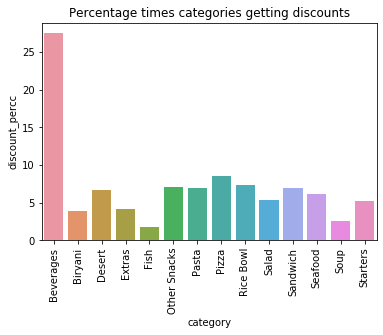

In [42]:
b = sns.barplot(data =pivot, x = 'category', y='discount_percc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Percentage times categories getting discounts')
plt.show()

beverages are getting discount around more than 25% times


# Categories getting high discounts on base price(By amount)

In [43]:
pivot=pd.DataFrame(res.groupby('category').discount_amt.sum()).reset_index()
pivot['discount_amt_percc'] = pivot['discount_amt']/pivot['discount_amt'].sum()*100
pivot

,category,discount_amt,discount_amt_percc
0,Beverages,1738100.00,17.369745
1,Biryani,217624.83,2.174839
2,Desert,848321.17,8.477718
3,Extras,430479.43,4.302007
4,Fish,182828.52,1.827101
5,Other Snacks,448135.39,4.478452
6,Pasta,896795.42,8.962147
7,Pizza,1980362.53,19.790801
8,Rice Bowl,730116.40,7.296436
9,Salad,274843.38,2.746654


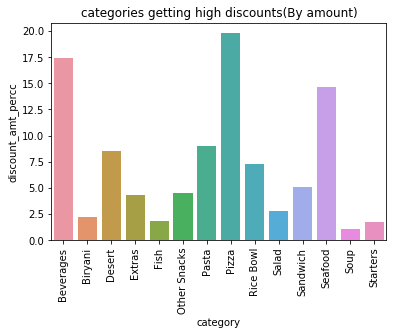

In [44]:
b = sns.barplot(data =pivot, x = 'category', y='discount_amt_percc')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('categories getting high discounts(By amount)')
plt.show()

Rice Bowl and pizza are getting highest discount on the base price

In [45]:
pivot = res.pivot_table(index=['week'], values=['num_orders'], aggfunc='sum').reset_index()
pivot


,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


# Plotting number of orders week wise

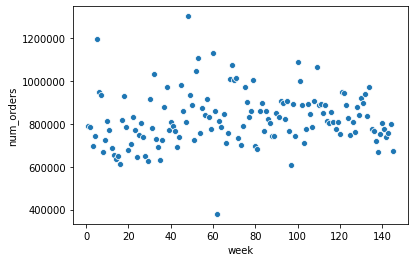

In [46]:
b = sns.scatterplot(data =pivot, x = 'week', y='num_orders')
plt.title('')
plt.show()

In [47]:
res.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt'],
      dtype='object')

# Feature Engineering and Selection


# Removing id column


In [48]:
res.drop(['id'],axis=1,inplace=True) #dropiing id columns 

In [49]:
res.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_amt
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1.0,15.46
284804,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0,1.0,2.00
285005,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,37.83
285106,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0,1.0,37.83
43263,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6,0.0,0.00


In [50]:
res.groupby('cuisine').checkout_price.mean()

cuisine
Continental    515.978809
Indian         340.769833
Italian        285.133102
Thai           213.323235
Name: checkout_price, dtype: float64

In [51]:
res.groupby('center_type').region_code.mean()

center_type
TYPE_A    57.081447
TYPE_B    54.680060
TYPE_C    57.209513
Name: region_code, dtype: float64

# DISCOUNT,DISCOUNT_AMT  columns made in EDA section.


# Discount is a binary column stating wether discount was there on order or not

# Discount Amt is continous column which states the ammount of discount offered.|| Discount_amt=(base_price-checkout_price)*num_orders

Checking the correlation of the discount and discount amt feature with correlation matrix

In [52]:
res.corr()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount_amt
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.017744,0.010997
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869,-0.002971,-0.002247
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,-0.033679,-0.025262
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569,-0.103340,0.005878
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031,0.043064,0.307343
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,0.276454,0.552075
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,0.213979,0.369758
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,0.111766,0.152950
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,0.003876,0.008345
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327,0.003672,0.005095


# Here we can see that dicount_ amt is having great correlation with target column

# Analyzing category and its respective cuisines

In [53]:
pivot=pd.DataFrame(res.groupby(['category','cuisine']).num_orders.sum()).reset_index()
pivot

,category,cuisine,num_orders
0,Beverages,Continental,5943046
1,Beverages,Indian,2345879
2,Beverages,Italian,13953970
3,Beverages,Thai,18237630
4,Biryani,Indian,631848
5,Desert,Indian,1940754
6,Extras,Thai,3984979
7,Fish,Continental,871959
8,Other Snacks,Thai,4766293
9,Pasta,Italian,1637744


# From here we can see that only beverage is the item which is all cuisine


# We can combine these columns and get one column called product

In [54]:
res["item"] = res["category"] +"_"+ res["cuisine"]

In [55]:
res.item.value_counts()

Rice Bowl_Indian         33408
Beverages_Italian        33381
Sandwich_Italian         33291
Pizza_Continental        33138
Beverages_Thai           32659
Beverages_Continental    32554
Starters_Thai            29941
Other Snacks_Thai        29379
Beverages_Indian         29296
Desert_Indian            29294
Salad_Italian            28559
Pasta_Italian            27694
Seafood_Continental      26916
Biryani_Indian           20614
Extras_Thai              13562
Soup_Thai                12675
Fish_Continental         10187
Name: item, dtype: int64

In [56]:
res.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'discount', 'discount_amt', 'item'],
      dtype='object')

# Dropping the cuisine and category column as we already made a new column out of it

In [57]:
res.drop(['cuisine','category'],axis=1,inplace=True)

In [58]:
res.week.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145], dtype=int64)

# Splitting the data into two train and test 

# This is a forecasting problem statement so we need to preserve the time 

# So, Splitting on basis of week 

In [59]:
res_test=res[res['week']>131]

In [60]:
res_train=res[res['week']<=131]

In [61]:
res_train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,1.0,15.46,Beverages_Thai
284804,1,113,2444,658.63,660.63,0,0,14,680,77,TYPE_C,4.0,1.0,2.00,Seafood_Continental
285005,1,113,1525,244.50,282.33,0,0,14,680,77,TYPE_C,4.0,1.0,37.83,Other Snacks_Thai
285106,1,113,2704,242.50,280.33,0,0,121,680,77,TYPE_C,4.0,1.0,37.83,Other Snacks_Thai
43263,1,52,1248,247.35,247.35,0,0,81,685,56,TYPE_B,5.6,0.0,0.00,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,131,24,1207,334.65,334.65,0,0,337,614,85,TYPE_B,3.6,0.0,0.00,Beverages_Continental
6624,131,24,1727,466.63,465.63,0,0,512,614,85,TYPE_B,3.6,0.0,-1.00,Rice Bowl_Indian
441465,131,68,1445,767.33,766.33,0,0,54,676,34,TYPE_B,4.1,0.0,-1.00,Seafood_Continental
40695,131,109,2304,468.51,470.51,0,0,68,599,56,TYPE_A,3.6,1.0,2.00,Desert_Indian


In [62]:
res.groupby('center_type').num_orders.mean()

center_type
TYPE_A    262.394456
TYPE_B    318.856145
TYPE_C    206.670097
Name: num_orders, dtype: float64

# Target Encoding The center_type Columns

# Here we are using target encode , Using num_orders to encode the center_type will replace categorical variable with mean of num_of orders 

In [63]:
lookup=(res_train.groupby('center_type').num_orders.mean())
lookup

center_type
TYPE_A    265.492956
TYPE_B    320.991068
TYPE_C    208.512473
Name: num_orders, dtype: float64

In [64]:
res_train.loc[:,'center_type']=res_train['center_type'].map(lookup)


C:\Users\akhil.damri\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [65]:
lookup

center_type
TYPE_A    265.492956
TYPE_B    320.991068
TYPE_C    208.512473
Name: num_orders, dtype: float64

# Mapping the test data with lookup table 

In [66]:
res_test.loc[:,'center_type']=res_test['center_type'].map(lookup)


In [67]:
res_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
412100,132,102,1878,320.13,319.13,0,0,26,593,77,265.492956,2.8,0.0,-1.00,Starters_Thai
48810,132,52,2492,272.57,387.03,0,1,418,685,56,320.991068,5.6,1.0,114.46,Desert_Indian
252090,132,81,2490,276.51,275.51,0,0,271,526,34,265.492956,4.0,0.0,-1.00,Salad_Italian
159827,132,126,2707,238.65,238.65,0,0,716,577,56,265.492956,2.7,0.0,0.00,Beverages_Italian
411865,132,102,2704,249.29,320.13,0,0,107,593,77,265.492956,2.8,1.0,70.84,Other Snacks_Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,145,145,1778,160.05,160.08,1,0,378,620,77,265.492956,3.9,1.0,0.03,Beverages_Italian
350483,145,59,1445,727.53,726.53,0,1,40,456,56,265.492956,4.2,0.0,-1.00,Seafood_Continental
262083,145,73,1770,440.38,442.38,0,0,55,576,34,265.492956,4.0,1.0,2.00,Biryani_Indian
448468,145,51,2304,484.03,485.03,0,0,80,638,56,265.492956,7.0,1.0,1.00,Desert_Indian


# Target Encoding The item Columns

Encoding ITEM column with num_orders will replace the item with average number of order for each

itemList=list(res_train.item.unique())

for i in itemList:
    li=res_train[res_train['item']==i]
    encode=li.groupby('item').num_orders.mean()
    
    

In [68]:
res_train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
0,1,55,1885,136.83,152.29,0,0,177,647,56,208.512473,2.0,1.0,15.46,Beverages_Thai
284804,1,113,2444,658.63,660.63,0,0,14,680,77,208.512473,4.0,1.0,2.00,Seafood_Continental
285005,1,113,1525,244.50,282.33,0,0,14,680,77,208.512473,4.0,1.0,37.83,Other Snacks_Thai
285106,1,113,2704,242.50,280.33,0,0,121,680,77,208.512473,4.0,1.0,37.83,Other Snacks_Thai
43263,1,52,1248,247.35,247.35,0,0,81,685,56,320.991068,5.6,0.0,0.00,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,131,24,1207,334.65,334.65,0,0,337,614,85,320.991068,3.6,0.0,0.00,Beverages_Continental
6624,131,24,1727,466.63,465.63,0,0,512,614,85,320.991068,3.6,0.0,-1.00,Rice Bowl_Indian
441465,131,68,1445,767.33,766.33,0,0,54,676,34,320.991068,4.1,0.0,-1.00,Seafood_Continental
40695,131,109,2304,468.51,470.51,0,0,68,599,56,265.492956,3.6,1.0,2.00,Desert_Indian


In [69]:
encode=res_train.groupby('item').num_orders.mean()
encode

item
Beverages_Continental    187.544941
Beverages_Indian          78.743283
Beverages_Italian        417.052537
Beverages_Thai           567.435812
Biryani_Indian            30.377895
Desert_Indian             64.882145
Extras_Thai              297.124682
Fish_Continental          81.600654
Other Snacks_Thai        163.447175
Pasta_Italian             59.342252
Pizza_Continental        220.003578
Rice Bowl_Indian         627.252867
Salad_Italian            394.232813
Sandwich_Italian         534.568976
Seafood_Continental      102.777650
Soup_Thai                 78.721555
Starters_Thai            160.916568
Name: num_orders, dtype: float64

In [70]:
res_train.loc[:,'item']=res_train['item'].map(res_train.groupby('item').num_orders.mean())

C:\Users\akhil.damri\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Mapping encode lookup table with test set

In [71]:
res_test.loc[:,'item']=res_test['item'].map(encode)

In [72]:
res_test = res_test.apply(pd.to_numeric, errors='coerce')
res_train = res_train.apply(pd.to_numeric, errors='coerce')

In [73]:
res_train.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'discount', 'discount_amt',
       'item'],
      dtype='object')

In [74]:
res.meal_id.isnull().sum()

0

# meal_id and center_id are the columns which were used to merge table .

# meal_id and center_id are type of categorical variables of particular meal and center respectively 

In [75]:
print("Number of unique meals are :",res.meal_id.nunique())
print("Number of unique centers are :",res.center_id.nunique())

Number of unique meals are : 51
Number of unique centers are : 77


# Target Encoding meal_id and center_id

In [76]:
tencode=res_train.groupby('meal_id').num_orders.mean()


In [77]:
res_train.loc[:,'meal_id']=res_train['meal_id'].map(tencode)

In [78]:
res_test.loc[:,'meal_id']=res_test['meal_id'].map(tencode)

# Target Encoding center_id

In [79]:
ncode=res_train.groupby('center_id').num_orders.mean()


In [80]:
res_train.loc[:,'center_id']=res_train['center_id'].map(ncode)

In [81]:
res_test.loc[:,'center_id']=res_test['center_id'].map(ncode)

In [82]:
res_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,discount,discount_amt,item
412100,132,192.739258,152.193052,320.13,319.13,0,0,26,593,77,265.492956,2.8,0.0,-1.00,160.916568
48810,132,446.205153,55.721385,272.57,387.03,0,1,418,685,56,320.991068,5.6,1.0,114.46,64.882145
252090,132,194.394563,418.330640,276.51,275.51,0,0,271,526,34,265.492956,4.0,0.0,-1.00,394.232813
159827,132,293.465893,540.477551,238.65,238.65,0,0,716,577,56,265.492956,2.7,0.0,0.00,417.052537
411865,132,192.739258,164.307614,249.29,320.13,0,0,107,593,77,265.492956,2.8,1.0,70.84,163.447175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,145,260.646079,289.584113,160.05,160.08,1,0,378,620,77,265.492956,3.9,1.0,0.03,417.052537
350483,145,291.047556,110.765681,727.53,726.53,0,1,40,456,56,265.492956,4.2,0.0,-1.00,102.777650
262083,145,196.318109,28.260529,440.38,442.38,0,0,55,576,34,265.492956,4.0,1.0,2.00,30.377895
448468,145,328.555969,62.809436,484.03,485.03,0,0,80,638,56,265.492956,7.0,1.0,1.00,64.882145


In [83]:
y_train= res_train.filter(['num_orders'], axis=1)

In [84]:
X_train=res_train.drop(['num_orders'],axis=1)

In [85]:
y_test= res_test.filter(['num_orders'], axis=1)

In [86]:
X_test=res_test.drop(['num_orders'],axis=1)

In [87]:
import xgboost as xgb

#  GETTING FEATURE SCORE

In [88]:
from sklearn.metrics import auc, accuracy_score, mean_squared_error,mean_absolute_error

In [89]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

[22:01:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Plotting F-score (feature importance)

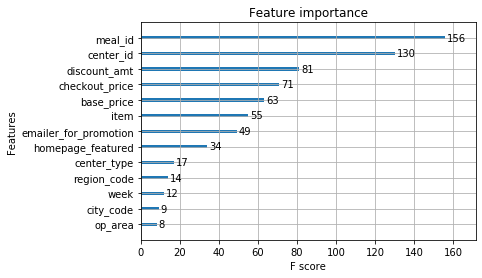

In [90]:
xgb.plot_importance(xgb_model)

# discount_amt , base_price ,meal_id, center_id, checkout_price, item are most contributing features

# Dropping columns with less f-score

In [91]:
res_test.drop(['discount','city_code'],axis=1,inplace=True)
res_train.drop(['discount','city_code'],axis=1,inplace=True)

# Final Columns taken for training

In [92]:
res_train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,center_type,op_area,discount_amt,item
0,1,165.758152,756.355467,136.83,152.29,0,0,177,56,208.512473,2.0,15.46,567.435812
284804,1,248.658084,105.506476,658.63,660.63,0,0,14,77,208.512473,4.0,2.00,102.777650
285005,1,248.658084,184.997499,244.50,282.33,0,0,14,77,208.512473,4.0,37.83,163.447175
285106,1,248.658084,164.307614,242.50,280.33,0,0,121,77,208.512473,4.0,37.83,163.447175
43263,1,446.205153,87.420254,247.35,247.35,0,0,81,56,320.991068,5.6,0.00,78.743283


In [93]:
y_train= res_train.filter(['num_orders'], axis=1)
X_train=res_train.drop(['num_orders'],axis=1)
y_test= res_test.filter(['num_orders'], axis=1)
X_test=res_test.drop(['num_orders'],axis=1)
#y_train=np.log(y_train)

# Applying model

Feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training model using XGBoost Regressor

In [94]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

[22:02:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# RMSE ON TEST SET

In [95]:
y_pred = xgb_model.predict(X_test)
#y_pred=np.exp(y_pred)
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

194.85577256511246


# RMSE ON TRAIN SET

In [96]:
y_pred1= xgb_model.predict(X_train)
#y_pred1=np.exp(y_pred1)
#y_train=np.exp(y_train)
mse=mean_squared_error(y_train, y_pred1)

print(np.sqrt(mse))

202.03542255845903


# MAE on TEST SET

In [97]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

97.61482995362421

# MAE ON TRAIN SET

In [98]:
mae=mean_absolute_error(y_train,y_pred1)
mae

102.45140305487588

# R2 SCORE ON TEST SET


In [99]:
r2_score(y_test, y_pred)

0.6853579461005632

# R2 SCORE ON TRAIN SET


In [100]:
r2_score(y_train, y_pred1)

0.7460475175660572

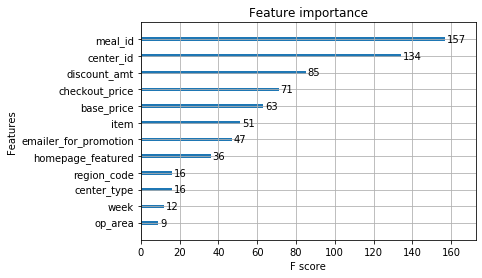

In [101]:
xgb.plot_importance(xgb_model)

In [102]:
    
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


# Linear Regression 

In [103]:
X_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,discount_amt,item
412100,132,192.739258,152.193052,320.13,319.13,0,0,77,265.492956,2.8,-1.00,160.916568
48810,132,446.205153,55.721385,272.57,387.03,0,1,56,320.991068,5.6,114.46,64.882145
252090,132,194.394563,418.330640,276.51,275.51,0,0,34,265.492956,4.0,-1.00,394.232813
159827,132,293.465893,540.477551,238.65,238.65,0,0,56,265.492956,2.7,0.00,417.052537
411865,132,192.739258,164.307614,249.29,320.13,0,0,77,265.492956,2.8,70.84,163.447175
...,...,...,...,...,...,...,...,...,...,...,...,...
287668,145,260.646079,289.584113,160.05,160.08,1,0,77,265.492956,3.9,0.03,417.052537
350483,145,291.047556,110.765681,727.53,726.53,0,1,56,265.492956,4.2,-1.00,102.777650
262083,145,196.318109,28.260529,440.38,442.38,0,0,34,265.492956,4.0,2.00,30.377895
448468,145,328.555969,62.809436,484.03,485.03,0,0,56,265.492956,7.0,1.00,64.882145


In [104]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 255.40993671339578


In [105]:
y_pred

array([[  14.03719394],
       [ 484.67071764],
       [ 286.32806463],
       ...,
       [-117.50102976],
       [  62.92995034],
       [ -90.93546756]])

# R2 score Linear Regression

In [106]:
r2_score(y_test, y_pred)

0.45941275444113894

In [107]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

8639


# KNN 

In [108]:
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 207.62892070980334


In [109]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0


# KNN R2 Score

In [110]:
r2_score(y_test, y_pred)

0.6427552059035682

# Decision Tree Regressor

In [111]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 212.9958086149232


In [112]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0


# Decision Tree R2 score

In [113]:
r2_score(y_test, y_pred)

0.624048059607405

In [114]:
print('Root Mean Squared Error for DT:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DT: 212.9958086149232


Number of negative value

In [115]:
flag=0
for i in y_pred:
    if i<0:
        flag=flag+1
print(flag)

0


RMSLE

In [116]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

0.7125880563140256

# LGBMR

In [117]:
import lightgbm as lgb


In [118]:
gbm = lgb.LGBMRegressor()

In [119]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[1]	valid_0's l1: 195.592	valid_0's l2: 106982
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 182.781	valid_0's l2: 95210.6
[3]	valid_0's l1: 171.77	valid_0's l2: 85868.7
[4]	valid_0's l1: 162.391	valid_0's l2: 77991.5
[5]	valid_0's l1: 153.958	valid_0's l2: 71346.6
[6]	valid_0's l1: 147.028	valid_0's l2: 66297.2
[7]	valid_0's l1: 141.026	valid_0's l2: 61928.8
[8]	valid_0's l1: 135.237	valid_0's l2: 57804.4
[9]	valid_0's l1: 130.796	valid_0's l2: 54787.3
[10]	valid_0's l1: 126.681	valid_0's l2: 52299.7
[11]	valid_0's l1: 122.628	valid_0's l2: 49205.1
[12]	valid_0's l1: 119.353	valid_0's l2: 47545.8
[13]	valid_0's l1: 116.469	valid_0's l2: 45435.4
[14]	valid_0's l1: 113.975	valid_0's l2: 44127.7
[15]	valid_0's l1: 111.494	valid_0's l2: 42475.8
[16]	valid_0's l1: 109.662	valid_0's l2: 41407.8
[17]	valid_0's l1: 108.046	valid_0's l2: 40583.8
[18]	valid_0's l1: 106.441	valid_0's l2: 39552
[19]	valid_0's l1: 105.242	valid_0's l2: 38889.7
[20]	valid_0's l1: 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [120]:
y_pred=gbm.predict(X_test)

RMSE

In [121]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

178.676218604032

R2 SCORE

In [122]:
r2_score(y_test, y_pred)

0.7354402804974258

Number of negative value

In [123]:
flag=0
index=0
for i in y_pred:
    if i<0:
        print(index)
        flag=flag+1
    index=index+1
print(flag)

0


In [124]:
np.sqrt(mean_squared_log_error( y_test, y_pred ))

0.6394916952066211

In [125]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

0.6394916952066211

MAE

In [126]:
mae=mean_absolute_error(y_test,y_pred)
mae

89.36774548572878

# VOTING REGRESSOR

In [127]:
from sklearn.ensemble import VotingRegressor
r1 = xgb.XGBRegressor(objective="reg:linear", random_state=42)
r2 = lgb.LGBMRegressor()
er = VotingRegressor([('xgb_model', r1), ('dt', r2)])
print(er.fit(X_train, y_train).predict(X_test))
y_pred=er.predict(X_test)
r2_score(y_test, y_pred)

C:\Users\akhil.damri\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 94.38870653 200.79760785 215.25313691 ...  26.60405556  52.23852663
  42.57730452]


0.7189952175179168

In [128]:
r2_score(y_test, y_pred)

0.7189952175179168

In [129]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

184.14577022468293

# HERE WE CAN SEE THAT LGBM IS PERFORMING WAY BETTER 

# Analyzing results

# Scaling features

In [130]:
y_train= res_train.filter(['num_orders'], axis=1)
X_train=res_train.drop(['num_orders'],axis=1)
y_test= res_test.filter(['num_orders'], axis=1)
X_test=res_test.drop(['num_orders'],axis=1)
#y_train=np.log(y_train)

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Applying LDA

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\akhil.damri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

C:\Users\akhil.damri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akhil.damri\anaconda3\lib\site-packages\lightgbm\basic.py:253: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "


[1]	valid_0's l1: 194.711	valid_0's l2: 105948
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 181.456	valid_0's l2: 93583
[3]	valid_0's l1: 170.126	valid_0's l2: 83650.8
[4]	valid_0's l1: 160.513	valid_0's l2: 75681.8
[5]	valid_0's l1: 152.406	valid_0's l2: 69297.3
[6]	valid_0's l1: 145.538	valid_0's l2: 64191.7
[7]	valid_0's l1: 139.768	valid_0's l2: 60109.4
[8]	valid_0's l1: 134.944	valid_0's l2: 56850.6
[9]	valid_0's l1: 130.949	valid_0's l2: 54259.7
[10]	valid_0's l1: 127.634	valid_0's l2: 52198.9
[11]	valid_0's l1: 124.861	valid_0's l2: 50564.1
[12]	valid_0's l1: 122.552	valid_0's l2: 49273
[13]	valid_0's l1: 120.634	valid_0's l2: 48257.6
[14]	valid_0's l1: 119.053	valid_0's l2: 47462.6
[15]	valid_0's l1: 117.726	valid_0's l2: 46839.6
[16]	valid_0's l1: 116.629	valid_0's l2: 46358.3
[17]	valid_0's l1: 115.708	valid_0's l2: 45986.2
[18]	valid_0's l1: 114.959	valid_0's l2: 45702.4
[19]	valid_0's l1: 114.349	valid_0's l2: 45492
[20]	valid_0's l1: 113

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [134]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

184.14577022468293

# Visualising the Training set results

C:\Users\akhil.damri\anaconda3\lib\site-packages\lightgbm\basic.py:253: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "


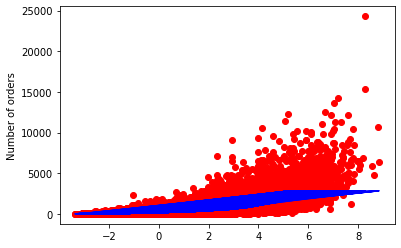

In [135]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, gbm.predict(X_train), color = 'blue')

plt.ylabel('Number of orders')
plt.show()

# Visualising the Test set results

C:\Users\akhil.damri\anaconda3\lib\site-packages\lightgbm\basic.py:253: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "


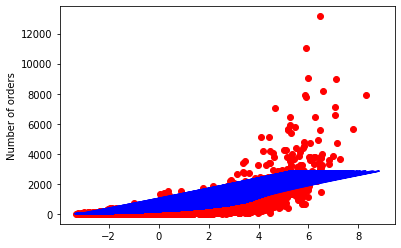

In [136]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, gbm.predict(X_train), color = 'blue')

plt.ylabel('Number of orders')
plt.show()

# Here best is to apply KERNEL PCA with gaussian ..but due to computation not possible

In [176]:
y_train= res_train.filter(['num_orders'], axis=1)
X_train=res_train.drop(['num_orders'],axis=1)
y_test= res_test.filter(['num_orders'], axis=1)
X_test=res_test.drop(['num_orders'],axis=1)
#y_train=np.log(y_train)

In [177]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1')

[1]	valid_0's l1: 195.592	valid_0's l2: 106982
[2]	valid_0's l1: 182.781	valid_0's l2: 95210.6
[3]	valid_0's l1: 171.77	valid_0's l2: 85868.7
[4]	valid_0's l1: 162.391	valid_0's l2: 77991.5
[5]	valid_0's l1: 153.958	valid_0's l2: 71346.6
[6]	valid_0's l1: 147.028	valid_0's l2: 66297.2
[7]	valid_0's l1: 141.026	valid_0's l2: 61928.8
[8]	valid_0's l1: 135.237	valid_0's l2: 57804.4
[9]	valid_0's l1: 130.796	valid_0's l2: 54787.3
[10]	valid_0's l1: 126.681	valid_0's l2: 52299.7
[11]	valid_0's l1: 122.628	valid_0's l2: 49205.1
[12]	valid_0's l1: 119.353	valid_0's l2: 47545.8
[13]	valid_0's l1: 116.469	valid_0's l2: 45435.4
[14]	valid_0's l1: 113.975	valid_0's l2: 44127.7
[15]	valid_0's l1: 111.494	valid_0's l2: 42475.8
[16]	valid_0's l1: 109.662	valid_0's l2: 41407.8
[17]	valid_0's l1: 108.046	valid_0's l2: 40583.8
[18]	valid_0's l1: 106.441	valid_0's l2: 39552
[19]	valid_0's l1: 105.242	valid_0's l2: 38889.7
[20]	valid_0's l1: 104.22	valid_0's l2: 38340.5
[21]	valid_0's l1: 103.361	valid_0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Predicting of global test set

In [178]:
gtest=pd.read_csv("test_QoiMO9B.csv")

# Shaping the test set by maping and engineering the features same as training set

In [179]:
test_set=pd.merge(gtest,df3,on=['meal_id'])
test_set=pd.merge(test_set,df2,on=['center_id'])
res.sort_values('week',inplace=True)

In [180]:
res_test.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'region_code', 'center_type', 'op_area', 'discount_amt', 'item'],
      dtype='object')

In [181]:
test_set.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [182]:
test_set.drop(['city_code','id'],axis=1,inplace=True)

Making the item column is test set

In [183]:
test_set["item"] = test_set["category"] +"_"+ test_set["cuisine"]

In [184]:
del test_set['category']
del test_set['cuisine']

In [185]:
test_set

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,item
0,146,55,1885,158.11,159.11,0,0,56,TYPE_C,2.0,Beverages_Thai
1,147,55,1885,159.11,159.11,0,0,56,TYPE_C,2.0,Beverages_Thai
2,149,55,1885,157.14,158.14,0,0,56,TYPE_C,2.0,Beverages_Thai
3,150,55,1885,159.14,157.14,0,0,56,TYPE_C,2.0,Beverages_Thai
4,151,55,1885,160.11,159.11,0,0,56,TYPE_C,2.0,Beverages_Thai
...,...,...,...,...,...,...,...,...,...,...,...
32568,146,61,2104,583.03,581.03,0,0,77,TYPE_A,4.5,Fish_Continental
32569,147,61,2104,582.03,582.03,0,1,77,TYPE_A,4.5,Fish_Continental
32570,149,61,2104,629.53,629.53,0,0,77,TYPE_A,4.5,Fish_Continental
32571,150,61,2104,629.53,629.53,0,0,77,TYPE_A,4.5,Fish_Continental


In [186]:
encode

item
Beverages_Continental    187.544941
Beverages_Indian          78.743283
Beverages_Italian        417.052537
Beverages_Thai           567.435812
Biryani_Indian            30.377895
Desert_Indian             64.882145
Extras_Thai              297.124682
Fish_Continental          81.600654
Other Snacks_Thai        163.447175
Pasta_Italian             59.342252
Pizza_Continental        220.003578
Rice Bowl_Indian         627.252867
Salad_Italian            394.232813
Sandwich_Italian         534.568976
Seafood_Continental      102.777650
Soup_Thai                 78.721555
Starters_Thai            160.916568
Name: num_orders, dtype: float64

mapping the item column with training set LOOKUP TABLE 

In [187]:
test_set.loc[:,'item']=test_set['item'].map(encode)

mapping the meail_id and center_id column with training set LOOKUP TABLE 

In [188]:
test_set.loc[:,'meal_id']=test_set['meal_id'].map(tencode)
test_set.loc[:,'center_id']=test_set['center_id'].map(ncode)

mapping the Center Type column with training set LOOKUP TABLE 

In [189]:
test_set.loc[:,'center_type']=test_set['center_type'].map(lookup)

Making the discount amt column

In [190]:
test_set['discount_amt'] = (test_set['base_price'] - test_set['checkout_price'])


In [191]:
test_set.discount_amt.describe()

count    32573.000000
mean        14.639175
std         39.374791
min        -76.570000
25%         -1.000000
50%          0.000000
75%          2.000000
max        820.590000
Name: discount_amt, dtype: float64

In [192]:
X_train.shape

(410536, 12)

In [193]:
test_set.shape

(32573, 12)

In [194]:
test_set

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,item,discount_amt
0,146,165.758152,756.355467,158.11,159.11,0,0,56,208.512473,2.0,567.435812,1.0
1,147,165.758152,756.355467,159.11,159.11,0,0,56,208.512473,2.0,567.435812,0.0
2,149,165.758152,756.355467,157.14,158.14,0,0,56,208.512473,2.0,567.435812,1.0
3,150,165.758152,756.355467,159.14,157.14,0,0,56,208.512473,2.0,567.435812,-2.0
4,151,165.758152,756.355467,160.11,159.11,0,0,56,208.512473,2.0,567.435812,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32568,146,209.105523,63.001096,583.03,581.03,0,0,77,265.492956,4.5,81.600654,-2.0
32569,147,209.105523,63.001096,582.03,582.03,0,1,77,265.492956,4.5,81.600654,0.0
32570,149,209.105523,63.001096,629.53,629.53,0,0,77,265.492956,4.5,81.600654,0.0
32571,150,209.105523,63.001096,629.53,629.53,0,0,77,265.492956,4.5,81.600654,0.0


predicting the values on test set

In [195]:
(test_set.columns)

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'region_code',
       'center_type', 'op_area', 'item', 'discount_amt'],
      dtype='object')

In [196]:
X_train.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'region_code',
       'center_type', 'op_area', 'discount_amt', 'item'],
      dtype='object')

In [197]:
res.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'discount', 'discount_amt',
       'item'],
      dtype='object')

In [198]:
X_train.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'region_code',
       'center_type', 'op_area', 'discount_amt', 'item'],
      dtype='object')

# Training on whole set

In [160]:
ds=res

In [161]:

ds.loc[:,'center_type']=ds['center_type'].map(ds.groupby('center_type').num_orders.mean())
ds.loc[:,'item']=ds['item'].map(ds.groupby('item').num_orders.mean())

ds.loc[:,'meal_id']=ds['meal_id'].map(ds.groupby('meal_id').num_orders.mean())
ds.loc[:,'center_id']=ds['center_id'].map(ds.groupby('center_id').num_orders.mean())

In [162]:
y= ds.filter(['num_orders'], axis=1)
X=ds.drop(['num_orders'],axis=1)


In [163]:
X.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'discount', 'discount_amt',
       'item'],
      dtype='object')

In [164]:
X.drop(['city_code','discount'],axis=1,inplace=True)

In [165]:
X.dtypes

week                       int64
center_id                float64
meal_id                  float64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
region_code                int64
center_type              float64
op_area                  float64
discount_amt             float64
item                     float64
dtype: object

In [166]:
gbm.fit(X_train, y_train,
        eval_set=[(X, y)],
        eval_metric='l1')

[1]	valid_0's l1: 212.476	valid_0's l2: 137439
[2]	valid_0's l1: 198.817	valid_0's l2: 121815
[3]	valid_0's l1: 186.957	valid_0's l2: 108851
[4]	valid_0's l1: 176.353	valid_0's l2: 97879.9
[5]	valid_0's l1: 167.145	valid_0's l2: 88852.7
[6]	valid_0's l1: 159.005	valid_0's l2: 81312.3
[7]	valid_0's l1: 152.125	valid_0's l2: 75023.4
[8]	valid_0's l1: 145.831	valid_0's l2: 69646.6
[9]	valid_0's l1: 140.408	valid_0's l2: 65149.2
[10]	valid_0's l1: 135.626	valid_0's l2: 61164
[11]	valid_0's l1: 131.251	valid_0's l2: 57642.5
[12]	valid_0's l1: 127.407	valid_0's l2: 54845.6
[13]	valid_0's l1: 124.059	valid_0's l2: 52381.6
[14]	valid_0's l1: 120.937	valid_0's l2: 50260.9
[15]	valid_0's l1: 118.297	valid_0's l2: 48479.5
[16]	valid_0's l1: 115.942	valid_0's l2: 46929.7
[17]	valid_0's l1: 113.983	valid_0's l2: 45406.5
[18]	valid_0's l1: 112.161	valid_0's l2: 44114.7
[19]	valid_0's l1: 110.534	valid_0's l2: 43006.9
[20]	valid_0's l1: 109.213	valid_0's l2: 42030.7
[21]	valid_0's l1: 107.853	valid_0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [199]:
pred=gbm.predict(test_set)

In [200]:
flag=0
for i in pred:
    if i<0:
        flag=flag+1
print(flag)

1


In [201]:
pred=pd.DataFrame(pred)

In [202]:
main= gtest.filter(['id'], axis=1)

In [203]:
big=pd.concat([main, pred], axis=1)

In [205]:
big.to_csv("sol1.csv")

In [173]:
flag=0
for i in pred:
    if i<0:
        flag=flag+1
print(flag)

0
